# Comparing Alcohol Content in Red and White Wines

#### By: Jaskaran Singh, Justin Wong, Matthew Gillies, Shehab Khan

Wine Quality Data Set:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Introduction

#### Introduction and Significance
For those who drink wine, knowing the alcohol content of the wine is often very important to them. The alcohol content of both red and white wines is a point of interest for both consumers and producers. 

For the consumer, alcohol equivalence can factor in purchasing decisions, especially with the type of liquor, brand, and the moderation in which the liquor is consumed. On the other hand, suppliers must maintain a consistent alcohol significance as several jurisdictions require a precise alcohol percentage listed on wine labels (The Nutrition Source, 2012). Furthermore, long-term cooperage can cause changing alcohol concentration levels, and it is thus essential that manufacturers predict and confirm the changing alcohol equivalencies and are precise to the listing on the wine label for utmost quality and satisfaction (The Nutrition Source, 2012). Additionally, the ethanol carries the scent that can differentiate different wines, and the alcohol equivalency is critical with this, too, meaning that differing alcohol percentages can change the taste and smell of the liquor (P. Cortez, n.d.). 

Evidently, the alcohol content of wine is a crucial factor for both sides of the business and can detail a lot about the quality of the wine. It is thus imperative that these measurements are accurate, and as such, it has prompted the following study.

#### This study
This study compares the mean alcohol content of wines from red and white wine datasets. The first data set contains 1599 red wines with data on their composition and quality. The other data set includes 4898 white wines with data on their composition and quality. These datasets will help to correlate the composition and quality of the two different types of wines from various data points. A hypothesis test will be performed comparing the mean alcohol content of the two types of wine, and a confidence interval of the difference in means of alcohol content in the two types of wine (red and white) will be obtained. Another aspect of this report will be to estimate this confidence interval using asymptotics and bootstrapping and comparing the two techniques. Along with this, the quantiles for the alcohol concentration in red and white wine will be analyzed.


### Attribute Information 
- `fixed acidity` - Primary fixed acids found in wine such as tartaric and malic acid. 
- `volatile acidity` - It is the gaseous acids present in the wine 
- `citric acid` - It is a weak organic fluid, found in citrus fruits naturally
- `residual sugar` - Amount of sugar left after fermentation 
- `chlorides` - Amount of salt present in wine 
- `free sulfur dioxide` - So2 is used for prevention of wine by oxidation and microbial spoilage 
- `total sulfur dioxide`
- `density` - The density of the wine 
- `pH` - Used for checking the amount of acidity 
- `sulphates` - Additional sulfites preserve the freshness and protects the wine from oxidation and bacteria 
- `alcohol` - Percent of alcohol present in the wine
- `quality` - Output variable 



# Methods and Results
## Preliminary Results

In [62]:
# The packages required for the analysis of this project 

suppressPackageStartupMessages({
library(cowplot)
library(digest)
library(gridExtra)
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
library(infer)
library(knitr)
})


In [98]:
# Read the two datasets (red wine and white wine csv) into jupyter notebook

wine_quality_red <- read_delim('winequality-red.csv', show_col_types = FALSE)
names(wine_quality_red) <- make.names(names(wine_quality_red), unique = TRUE)


wine_quality_white <- read_delim('winequality-white.csv', show_col_types = FALSE)
names(wine_quality_white) <- make.names(names(wine_quality_white), unique = TRUE)


# Combine the columns of the two datasets and specifying the type.

wine_quality_red <- cbind(wine_quality_red, type = "red")
wine_quality_white <- cbind(wine_quality_white, type = "white")

# Combine the rows of the two datasets based on the type of wine (red and white).

combined_data <- rbind(wine_quality_red, wine_quality_white)  
cat("Table 1: Initial Wine Combined Data")
head(combined_data) 

Table 1: Initial Wine Combined Data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


### Observed means for alcohol content in red and white wine
A random sample of size 100 was taken from each dataset and the mean alcohol content was estimated for both red and white wine.

In [99]:
set.seed(4242)

#Taking a sample of size 100 from the dataset

#red wine sample
alcohol_red_sample <- wine_quality_red %>% 
    rep_sample_n(size = 100, replace = FALSE) %>% 
    select(alcohol)

#white wine sample
alcohol_white_sample <- wine_quality_white %>% 
     rep_sample_n(size = 100, replace = FALSE) %>% 
     select(alcohol)


#Calculate the mean of alcohol content from the red wine sample 
observed_alc_red_mean <- alcohol_red_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

#Calculate the mean of alcohol content from the white wine sample
observed_alc_white_mean <- alcohol_white_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

cat(crayon::bold("Mean of alcohol content from red wine sample:"))
pull(observed_alc_red_mean)
cat(crayon::bold("Mean of alcohol content from white wine sample:"))
pull(observed_alc_white_mean)



Adding missing grouping variables: `replicate`

Adding missing grouping variables: `replicate`



Mean of alcohol content from red wine sample:

[1] 10.2775

Mean of alcohol content from white wine sample:

[1] 10.429

It can be estimated that the mean alcohol content in red wine is 10.2775 (vol.%) and the mean alcohol content in white wine is 10.429 (vol.%)

### Investigation on Quantiles for the alcohol content in red and white wine 

In [100]:
## Take a sample from the datasets and select the variable of interest (alcohol)

# sample from the red wine dataset
sample_red <- wine_quality_red%>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)

# sample from the white wine dataset
sample_white <- wine_quality_white %>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)


In [104]:
## Calculate 0.25th and 0.75th quantiles

#0.25th quantile for red wine 
lower_quantile <- sample_red %>%
    pull(alcohol) %>%
    quantile(0.25)

#0.75th quantile for red wine
upper_quantile <- sample_red %>%
    pull(alcohol) %>%
    quantile(0.75)

#0.25th quantile for white wine 
lower_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.25)

#0.75th quantile for white wine 
upper_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.75)

# difference of upper and lower quantile for red wine 
iqr <- as.numeric(upper_quantile) - as.numeric(lower_quantile)

#difference of upper and lower quantile for white wine 
iqr_white <- as.numeric(upper_quantile_white) - as.numeric(lower_quantile_white)


cat(crayon::bold("0.25th quantile for Red Wine:"))
lower_quantile #0.25th quantile for red wine 

cat(crayon::bold("0.75th quantile for Red Wine:"))
upper_quantile #0.75th quantile for red wine

cat(crayon::bold("Difference of Upper and Lower Quantile for Red Wine:"))
iqr # difference of upper and lower quantile for red wine 

cat(crayon::bold("0.25th quantile for White Wine:"))
lower_quantile_white #0.25th quantile for white wine 

cat(crayon::bold("0.75th quantile for White Wine:"))
upper_quantile_white #0.75th quantile for white wine 

cat(crayon::bold("Difference of Upper and Lower Quantile for White Wine:"))
iqr_white #difference of upper and lower quantile for white wine 

0.25th quantile for Red Wine:

25% 
9.5

0.75th quantile for Red Wine:

75% 
 11

Difference of Upper and Lower Quantile for Red Wine:

[1] 1.5

0.25th quantile for White Wine:

25% 
9.4

0.75th quantile for White Wine:

75% 
11.325

Difference of Upper and Lower Quantile for White Wine:

[1] 1.925

Based on the quantiles produced above, it appears that the alcohol content in white wine is not equal to the alcohol content in red wine. 

Figure 1: Sample Distributions of Red and White Wine Populations

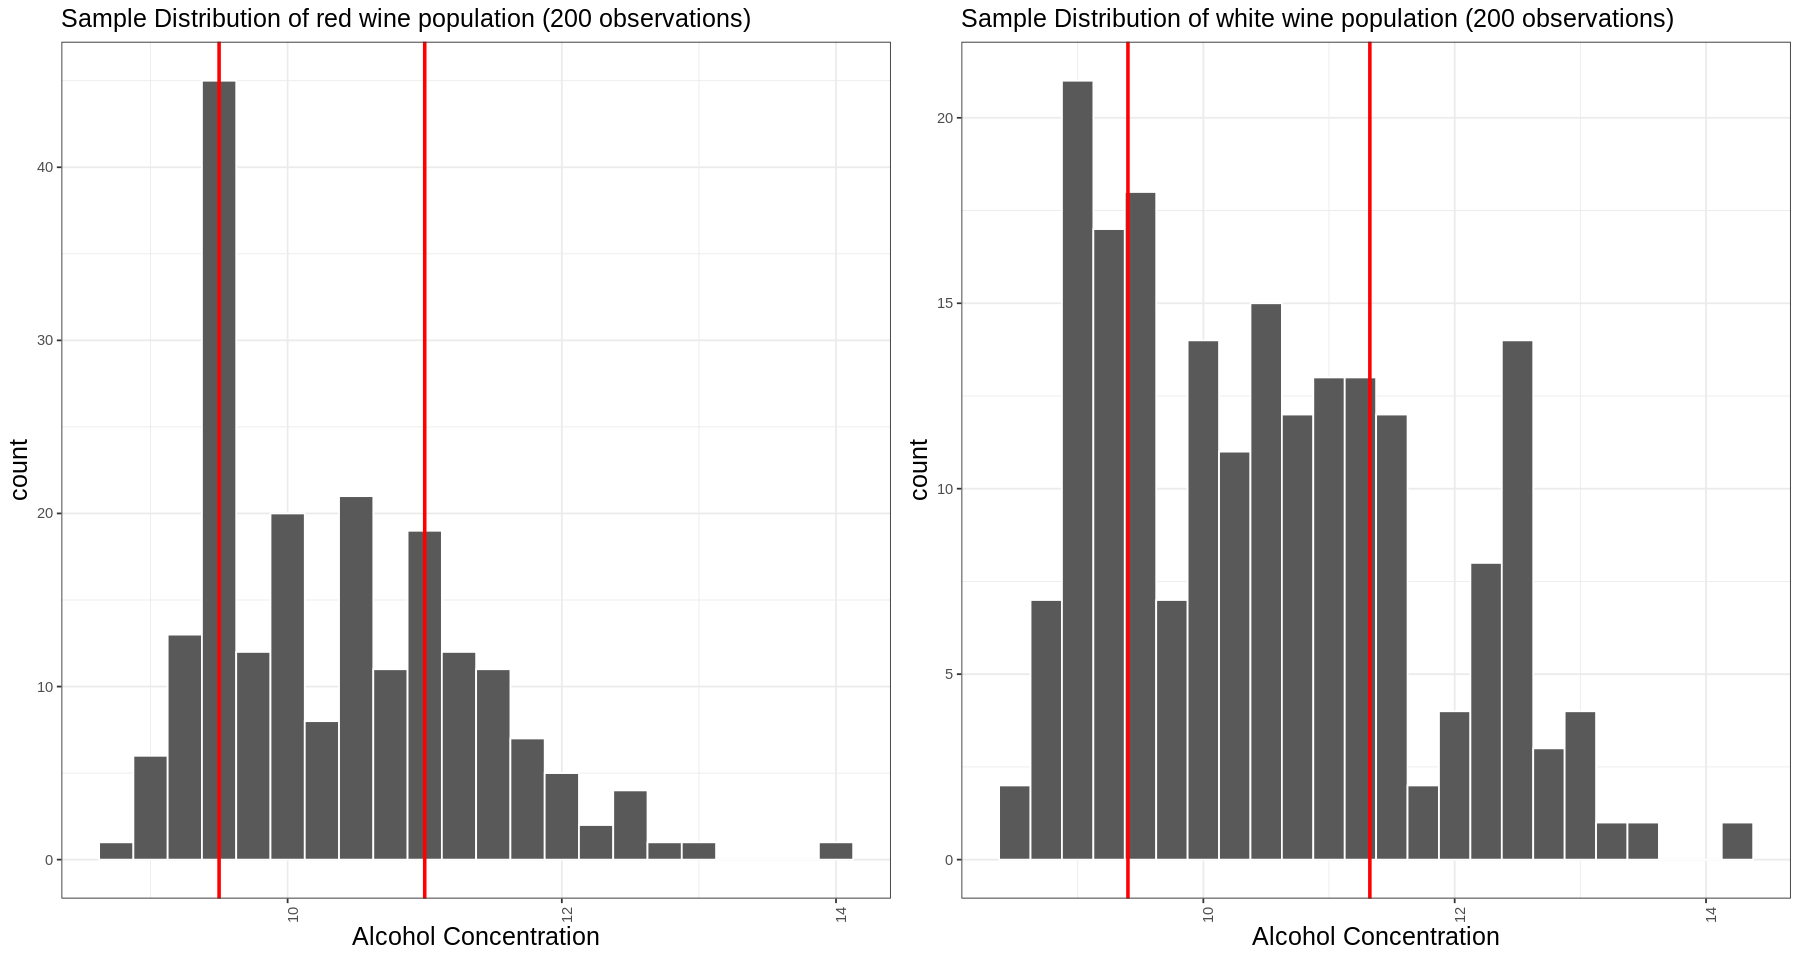

In [111]:
options(repr.plot.width = 15, repr.plot.height = 8)
## Plot the distribution of the sample with quantiles 
quantile_plot_red <- 
    sample_red %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile, colour = "red", size = 1) +
    labs(title = "Sample Distribution of red wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(plot.title = element_text(size = 15)) +
    theme(axis.title = element_text(size = 15))

quantile_plot_white <- 
    sample_white %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile_white, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile_white, colour = "red", size = 1) +
    labs(title = "Sample Distribution of white wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(plot.title = element_text(size = 15)) +
    theme(axis.title = element_text(size = 15))



plots_row <- plot_grid(quantile_plot_red + 
                           theme(axis.text.x = element_text(angle = 90)),

                           quantile_plot_white +  
                           theme(axis.text.x = element_text(angle = 90)), 
                           ncol = 2)

dist_grid <- plot_grid(plots_row, 
                        rel_heights = c(0.5, 1), rel_widths = c(2, 1))
cat("Figure 1: Sample Distributions of Red and White Wine Populations")
dist_grid


Figure 2: Boxplots for Sample Distribution Quantiles

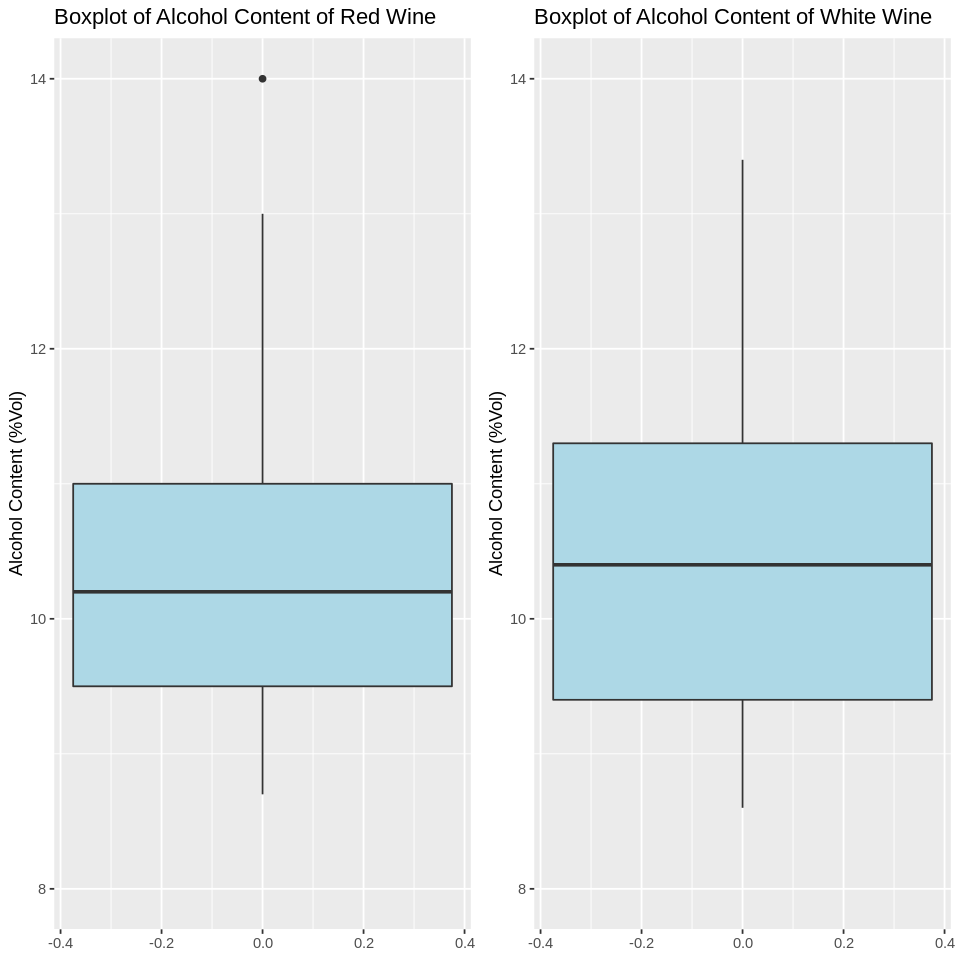

In [105]:
## Plot the distribution of the sample with boxplots  
options(warn = -1) 

quantile_box_plot_red <- ggplot(sample_red, aes(x = alcohol)) + 
    geom_boxplot(fill = "light blue") + xlim(8, 14) + coord_flip() + 
    xlab("Alcohol Content (%Vol)") + ggtitle("Boxplot of Alcohol Content of Red Wine")

quantile_box_plot_white <- ggplot(sample_white, aes(x = alcohol)) + 
    geom_boxplot(fill = "light blue") + xlim(8, 14) + coord_flip() +
    xlab("Alcohol Content (%Vol)") + ggtitle("Boxplot of Alcohol Content of White Wine")

cat("Figure 2: Boxplots for Sample Distribution Quantiles")
grid.arrange(quantile_box_plot_red, quantile_box_plot_white, ncol=2)

After examining the histograms and boxplots above, the previous statement of the means in alcohol content being different can be refuted, as it seems there is a usual number of values around point 9.5. It appears that the sample taken from the red wine population is slightly right-skewed, which explains the larger IQR. Therefore, an estimate is formed that the variance of alcohol in red wine and alcohol in white wine are approximately similar. A hypothesis test will be conducted later in the report to test this observation to see if the difference in means of the alcohol contents is significant, with a 5% significance level.

### Methods: Plan
This dataset is trustworthy since it comes from from a database recommended on the course page and is a reliable source. Moreover, an academic paper (Cortez et. al, 2009) was written on this data, further suggesting that it is a reliable source of data. To summarize the preliminary findings, the observed mean alcohol content for red and white wines was estimated through sampling. Furthermore, the IQR of the alcohol content of both types of wine was analyzed to compare the differences in alcohol content. This illustrated that the alcohol contents of both wines were reasonably similar. However, to test the significance of this difference, a hypothesis test will be conducted on these variables.

A hypothesis test will be conducted using the infer package wherein the null hypothesis states no significant difference between the mean alcohol amount in red wine and the mean alcohol amount in white wine. Additionally, a 95% confidence interval for the difference in means will be determined to support the analysis further.



## Results
### Hypothesis Test
H<sub>0</sub> : There is no significant difference between average alcohol amount in red wine and average alcohol amount in white wine <br />
(Alcohol Content of Red Wine - Alcohol Content of White Wine)

H<sub>A</sub> : There is significant difference between average alcohol amount in red wine and average alcohol amount in white wine <br /> (Alcohol Content of Red Wine - Alcohol Content of White Wine)

In [112]:
# Selecting the columns of interest from the combined dataset (alcohol and type) and 
# filtering out the na values from the alcohol column

alcohol_data <-
combined_data %>% 
select(alcohol, type) %>% 
filter(!is.na(alcohol))
cat("Table 2: Filtered Combined Data Containing Alcohol and Type of Wine")
head(alcohol_data)

Table 2: Filtered Combined Data Containing Alcohol and Type of Wine

,alcohol,type
,<dbl>,<chr>
1,9.4,red
2,9.8,red
3,9.8,red
4,9.8,red
5,9.4,red
6,9.4,red


In [113]:
# Counting the amount of each type of wine (red and white)
wines_count <-
    alcohol_data %>% 
    count(type)
cat("Table 3: Number of Data Points for Red and White Wine")
wines_count

Table 3: Number of Data Points for Red and White Wine

type,n
<chr>,<int>
red,1599
white,4898


In [71]:
# Calculating the observed test statistic using the infer package
obs_diff_in_means <- 
    alcohol_data  %>% 
    specify(formula = alcohol ~ type) %>%
    calculate(stat = "diff in means", order = c("red", "white")) %>% 
    pull(stat)
cat("Test Statistic:")
obs_diff_in_means

Test Statistic:

[1] -0.09128393

In [72]:
set.seed(1234)

# Generating 1000 samples from the null distribution
null_diff_in_means <- 
    alcohol_data %>% 
    specify(formula = alcohol ~ type) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("red", "white"))

Figure 3: Null Distribution and Test Statistic

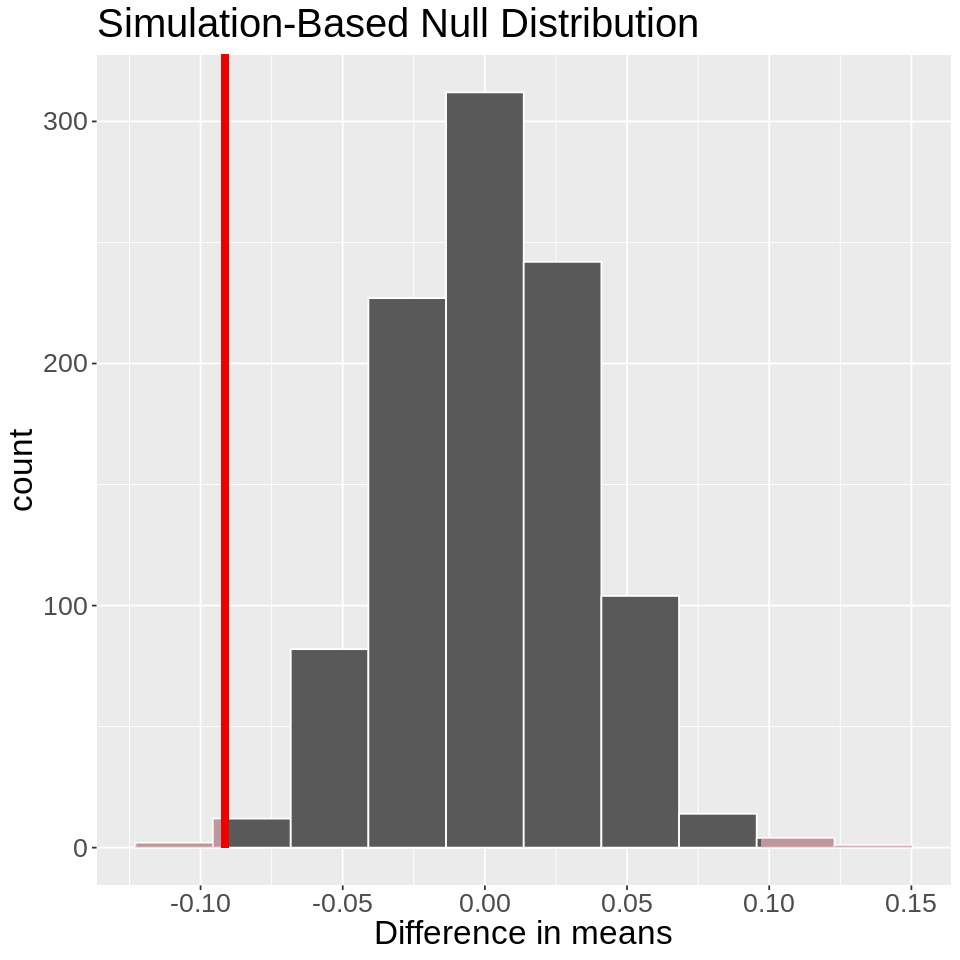

In [114]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Plot null distribution and observed the test-statistic 
diff_in_means_plot <-
    visualize(null_diff_in_means, bins = 10) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
cat("Figure 3: Null Distribution and Test Statistic")
diff_in_means_plot

The above distribution shows the null distribution of the difference in means and where the test statistic lies. This distribution supports the analysis since there is hardly any shaded region in the tails, suggesting that the likelihood of the null hypothesis being true is relatively small. If the null hypothesis were true, the shaded area would be larger.

In [115]:
# Finding the p-value using the infer package
p_value <-
    null_diff_in_means %>% 
    get_p_value(obs_stat = obs_diff_in_means, direction = "both") %>% 
    pull(p_value)

cat("p Value:")
p_value

p Value:

[1] 0.006

The obtained p-value is 0.006. The null hypothesis is rejected at a 5% significance level (0.05) since the observed p-value is less than the significance level. Based on the hypothesis test, there is a 95% confidence that the alcohol content of red wine is not equal to the alcohol content of white wine. The hypothesis test supports previous findings that estimate that white wine would have a higher mean alcohol content of 10.429 (vol.%) than red wine with a mean alcohol content of 10.277 (vol.%).

### 95% Confidence Interval for Difference in Means Using Bootstrapping

Next, the 95% confidence interval for the difference in means of alcohol content is constructed to examine the range of plausible values.

In [116]:
# Obtaining bootstrap distribution for the difference in means using the infer package 

diff_in_means_bootstrap_dist <- 
    alcohol_data %>%
    specify(formula = alcohol ~ type) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("red", "white"))  

In [117]:
# Finding the 95% confidence interval of the bootstrap distribution for the difference in means 
# using the infer package

diff_in_means_ci <- 
    diff_in_means_bootstrap_dist %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
cat("95% Confidence Interval From Bootstrapping:")
diff_in_means_ci

95% Confidence Interval From Bootstrapping:

lower_ci,upper_ci
<dbl>,<dbl>
-0.1510787,-0.02972907


<b>Lower Bound : -0.1514</b>

<b>Upper Bound : -0.0291</b>

Figure 4: Bootstrap Distribution with 95% Confidence Interval

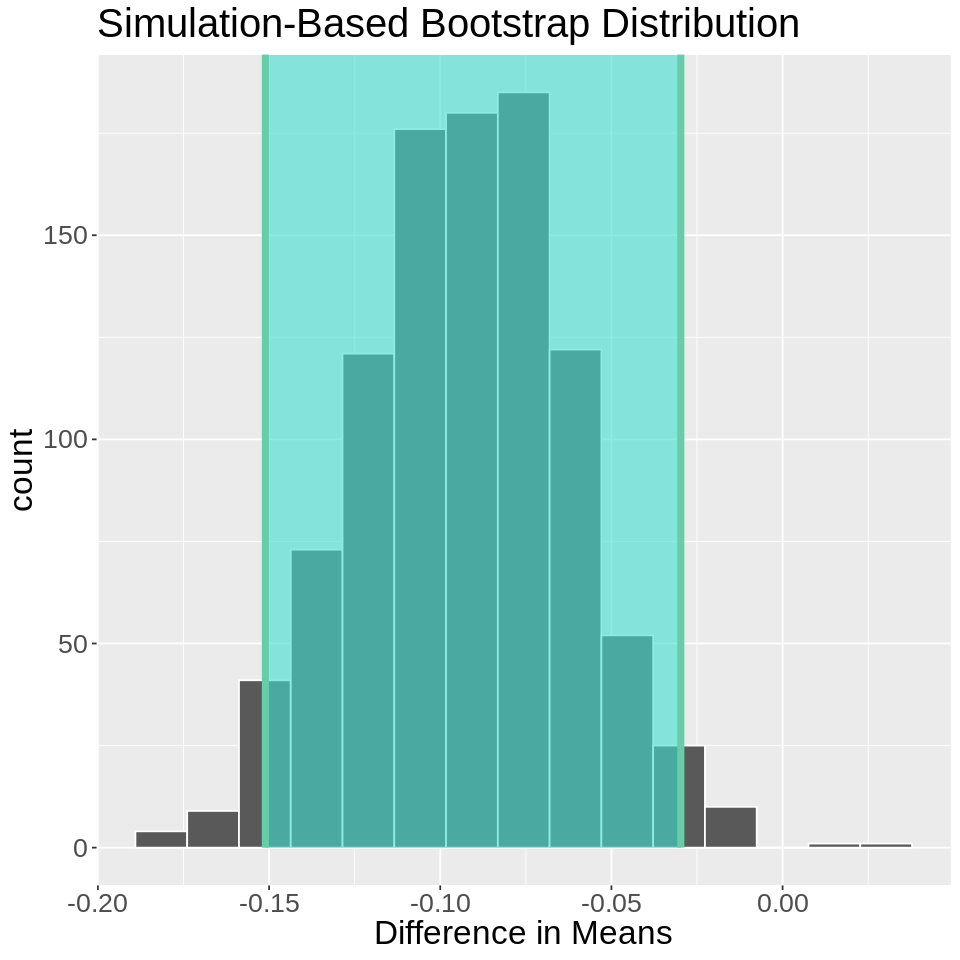

In [119]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Plotting the 95% confidence interval and bootstrap distribution

diff_in_means_ci_plot <-
    visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")
cat("Figure 4: Bootstrap Distribution with 95% Confidence Interval")
diff_in_means_ci_plot

From the distribution, it can be seen that the observed value of the difference in means, i.e. -0.09128, is contained inside the confidence interval. If repeated samples are taken, there is a 95% confidence that the observed value would lie inside the confidence interval. Additionally, it can be seen that 0 is not in the interval, further supporting the results of the hypothesis that the difference in means of alcohol content in red and white wines is not equal.

### 95% Confidence Interval for Difference in Means Using Asymptotics

<b>95% Confidence Interval for Difference in Means Using Central Limit Theorem

Next, the difference in means of the two wines is analyzed using asymptotics under the assumption of normality through the Central Limit Theorem.

In [78]:
# Taking a sample of 650 from the combined dataset for each type of wine (red and white)
set.seed(1234)

alcohol_sample <- 
    alcohol_data %>% 
    group_by(type) %>% 
    sample_n(size = case_when(type == "red" ~ 650,
                              type == "white" ~ 650), replace = FALSE) %>% 
    ungroup()

Figure 5: Sample Distribution of Alcohol Content of Red and White Wines

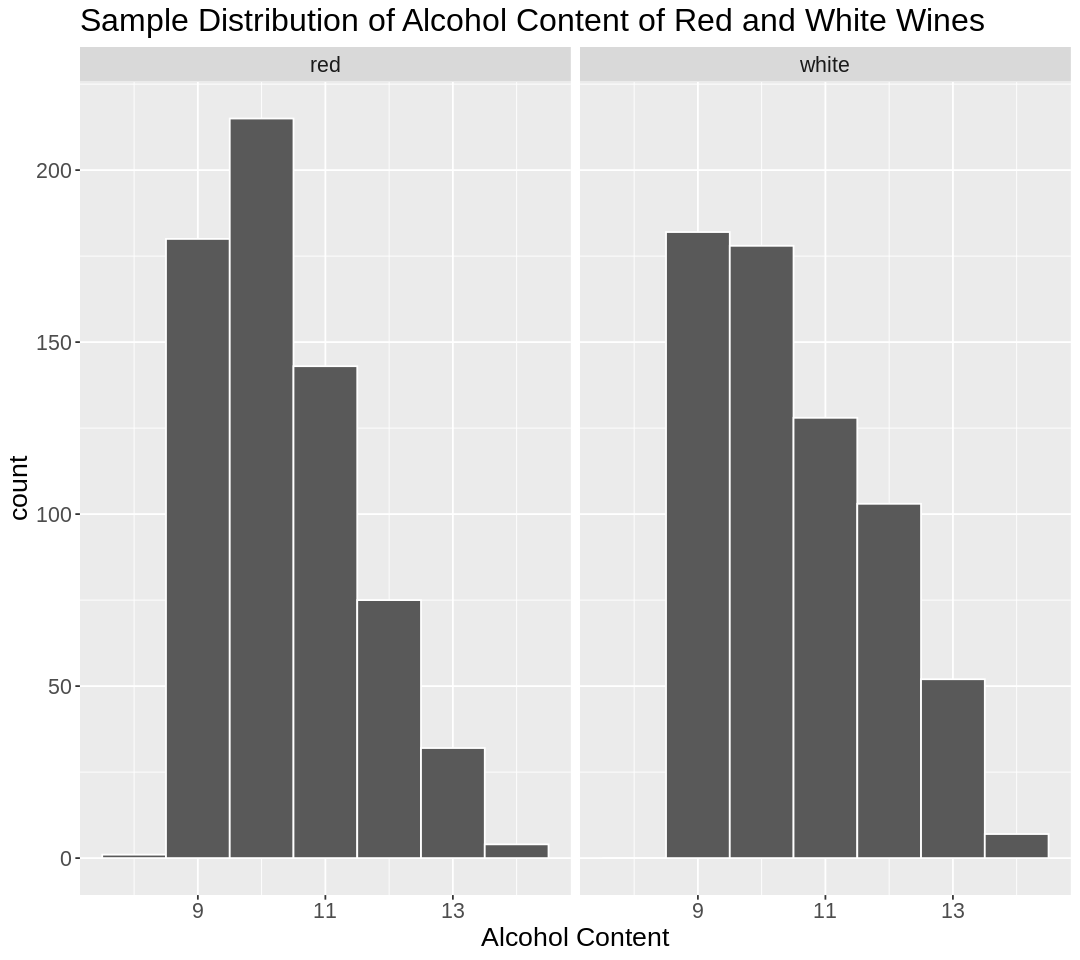

In [79]:
# Observe the sample distribution of each type of wine

options(repr.plot.width = 9, repr.plot.height = 8)

alocohol_samp_dist_plot <- 
    alcohol_sample %>% 
    ggplot() + 
    geom_histogram(aes(alcohol), binwidth = 1, color = 'white') +
    facet_wrap(~ type) + 
    theme(text = element_text(size = 16)) +
    ggtitle("Sample Distribution of Alcohol Content of Red and White Wines") + 
    xlab("Alcohol Content")

cat("Figure 5: Sample Distribution of Alcohol Content of Red and White Wines")
alocohol_samp_dist_plot



The plots above show that the sample distributions are not normally distributed as both plots are right-skewed. However, since the sample size is large enough and the samples are taken independently, by the Central Limit Theorem, the distribution can be approximated by the Normal distribution.

In [120]:
# Obtain the sample mean and standard error of alcohol content for each type of wine.

alcohol_summary <- 
    alcohol_sample %>% 
    group_by(type) %>% 
    summarise(sample_mean = mean(alcohol),
              sample_std_error = sd(alcohol)/sqrt(n())) 

cat("Table 4: Sample Means and Standard Errors")
alcohol_summary

Table 4: Sample Means and Standard Errors

type,sample_mean,sample_std_error
<chr>,<dbl>,<dbl>
red,10.44428,0.04289367
white,10.59132,0.05071732


In [121]:
# Obtain a 95% confidence interval for the difference in means using the Central Limit Theorem(CLT). 

red_mean <- alcohol_summary$sample_mean[1]
red_var <- alcohol_summary$sample_std_error[1]^2
white_mean <- alcohol_summary$sample_mean[2]
white_var <- alcohol_summary$sample_std_error[2]^2

alcohol_clt_ci <- 
    tibble(lower_ci = (red_mean - white_mean - qnorm(0.975) * sqrt(white_var + red_var)),
           upper_ci = (red_mean - white_mean + qnorm(0.975) * sqrt(white_var + red_var)))

cat("95% Confidence Interval From Central Limit Theorem:")
alcohol_clt_ci

95% Confidence Interval From Central Limit Theorem:

lower_ci,upper_ci
<dbl>,<dbl>
-0.2772292,-0.01685289


<b>Lower Bound : -0.2772</b>

<b>Upper Bound : -0.0169</b>

Under the assumption of normality, the confidence interval for the difference of means in alcohol content is [-0.2722, 0.0169]. This is somewhat similar to the previous interval obtained by bootstrapping. However, to analyze the approximation, the accuracy of this interval is tested below.

In [126]:
# Testing accuracy of the confidence interval by finding 100 95% confidence intervals

set.seed(1234)

# Obtain the means
true_means <-
    alcohol_data %>% 
    group_by(type) %>% 
    summarise(sample_mean = mean(alcohol)) %>% 
    pull(sample_mean)

# Obtain the true difference in mean
true_diff = true_means[1] - true_means[2]

# Taking 100 samples for the confidence intervals using samples of 650 for each type of wine (red and white)
alcohol_multiple_samples <- 
    tibble(replicate = 1:100) %>% 
    mutate(sample = map(replicate,
                        `.f` = ~
                            alcohol_data %>% 
                            group_by(type) %>% 
                            sample_n(size = case_when(type == "red" ~ 650,
                                                      type == "white" ~ 650), replace = FALSE) %>% 
                            ungroup() 
                    )
    ) %>% 
    unnest(sample) %>% 
    group_by(replicate, type) %>% 
    summarise(sample_mean = mean(alcohol),
              sample_std_error = sd(alcohol)/sqrt(n()),
              n = n()) %>% 
    pivot_wider(names_from = type, values_from = c(sample_mean, sample_std_error, n))


`summarise()` has grouped output by 'replicate'. You can override using the `.groups` argument.



In [127]:
# Obtaining multiple confidence intervals from different samples.

alcohol_multiple_ci <-
    alcohol_multiple_samples %>% 
    mutate(lower_ci = sample_mean_red - sample_mean_white - qnorm(0.975) * sqrt(sample_std_error_red^2+sample_std_error_white^2),
           upper_ci = sample_mean_red - sample_mean_white + qnorm(0.975) * sqrt(sample_std_error_red^2+sample_std_error_white^2)) %>% 
    select(replicate, lower_ci, upper_ci) %>% 
    mutate(captured = between(true_diff, lower_ci, upper_ci))


Figure 6: 100 95% Confidence Intervals

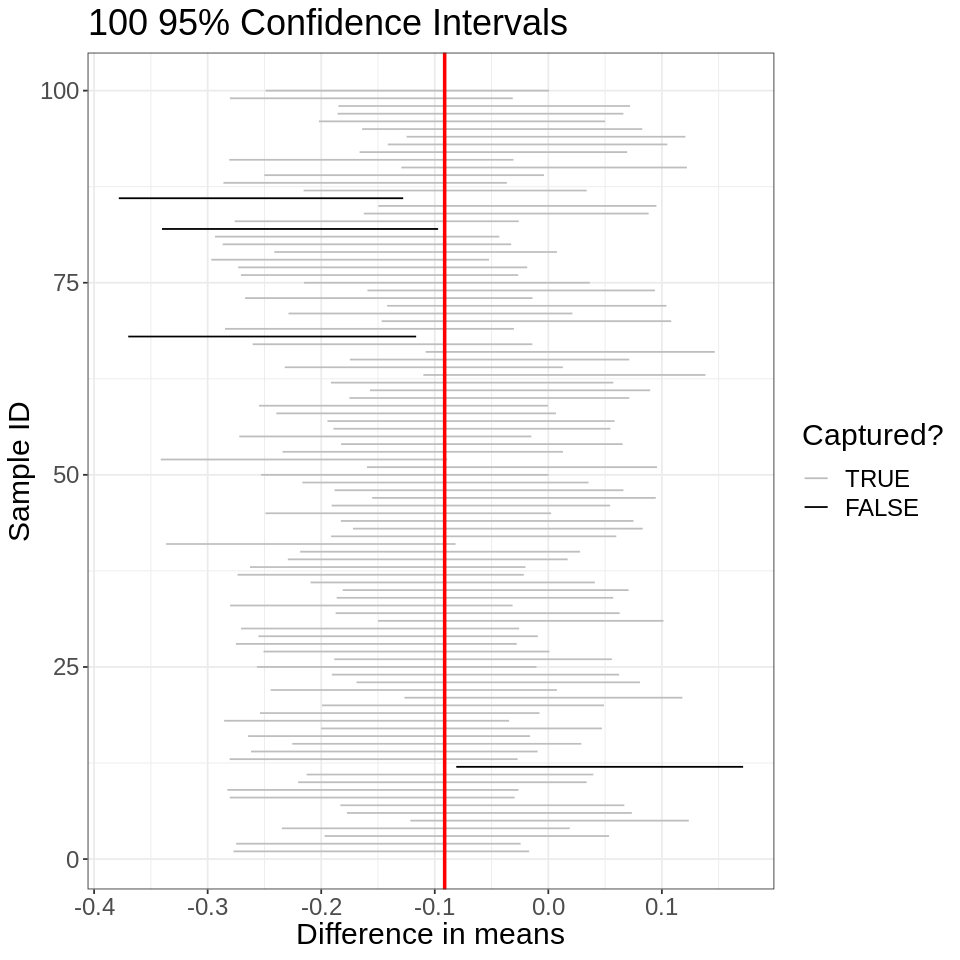

In [128]:
# Plotting multiple confidence intervals and observing if they capture the true difference in means

alcohol_multiple_ci %>% 
    ggplot() +
    scale_colour_manual(breaks = c("TRUE", "FALSE"), 
                        values = c("grey", "black")) +
    geom_segment(aes(x = lower_ci,
                     xend = upper_ci,
                     y = replicate,
                     yend = replicate,
                     colour = captured)) +
    geom_vline(xintercept = true_diff, colour = "red", size = 1) +
    labs(title = "100 95% Confidence Intervals",
         x = 'Difference in means',
         y = "Sample ID",
         colour = "Captured?") +
    theme_bw() + 
    theme(text = element_text(size = 18))

cat("Figure 6: 100 95% Confidence Intervals")



The plot above shows that even though the population is not Normal, the CLT approximation is relatively accurate. Only 4 intervals do not capture the true difference in means, which is about what is expected with a 95% confidence interval. However, the plot also shows that many of the intervals include 0, which would contradict the results obtained from the hypothesis test. To further investigate the 95% confidence interval of the difference of means, the interval is obtained using the t-distribution.

<b>95% Confidence Interval for Difference in Means Using t Distribution

Next, the confidence interval for the difference in means of the two wines is analyzed using asymptotics and the t-distribution.

In [129]:
# Using t.test and tidy to obtain confidence interval from t-distribution

t_test <- tidy(t.test(wine_quality_red$alcohol, wine_quality_white$alcohol))
cat("Table 5: Result of t.test")
t_test

t_ci <- t_test %>% 
select(conf.low, conf.high)

cat("95% Confidence Interval From t-distribution:")
t_ci

Table 5: Result of t.test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.09128393,10.42298,10.51427,-2.859029,0.00427778,3100.475,-0.1538867,-0.02868117,Welch Two Sample t-test,two.sided


95% Confidence Interval From t-distribution:

conf.low,conf.high
<dbl>,<dbl>
-0.1538867,-0.02868117


<b>Lower Bound : -0.1539</b>

<b>Upper Bound : -0.0287</b>

This interval is quite similar to the previous interval obtained by bootstrapping. It also supports the hypothesis test results since 0 is not in the interval.

### Overview of 95% Confidence Intervals for Difference in Means of Alcohol Content In Red and White Wine

Confidence interval using Bootstrapping: <b>[-0.1514, -0.0291]
    
Confidence interval using CLT: <b>[-0.2772, -0.0169]

Confidence interval using t.test: <b>[-0.1539, -0.0287]

# Discussion
## Findings
#### Hypothesis Test
From the hypothesis test conducted in the report, a p-value of 0.06 is obtained. At a 5% significance level, this p-value leads to a rejection of the null hypothesis. This suggests that with 95% confidence, the mean alcohol content of red and white wines is significantly different. This conclusion supports the estimates made in the preliminary results that white wine had a slightly higher and not equal mean alcohol content compared to red wine.

#### Comparing Bootstrapping and Asymptotics Methods For 95% Confidence Intervals
Overall, the confidence intervals obtained by all three methods (bootstrapping, CLT, t-distribution) were relatively similar. Each of the intervals did not contain the value 0, which supports the hypothesis test results that the mean alcohol content in red and white wines are not equal. Furthermore, the negative signs for the confidence intervals support the preliminary results that suggested that white wines had a higher alcohol concentration than red wines.

Moreover, the confidence intervals obtained by bootstrapping [-0.1514, -0.0291] and the t-distribution were remarkably similar [-0.1539, -0.0287]. Although the interval obtained through the CLT [-0.2772, -0.0169] was reasonably close, the interval is wider than the others and relatively different from bootstrapping and t-distribution intervals. Additionally, as shown in Figure 6, some of the confidence interval estimates using the CLT did contain zero, which would contradict the findings obtained from both the hypothesis test and confidence intervals from bootstrapping and the t-distribution.

Hence, the interval obtained by the CLT and the assumption of normality is likely the least reliable of the 95% confidence intervals. This may be because the t-distribution accounts for additional uncertainty that the normal distribution does not account for due to the heavier tails of the t-distribution. Hence, the t-distribution can give a more precise estimation of the interval.

Overall, the three confidence intervals all support the hypothesis test results. Although the difference in means is relatively small, the confidence intervals suggest that the mean alcohol content by percent volume of white wines is significantly higher than red wines with a 95% confidence.


## What impact could such findings have?
The study provides information on how the mean alcohol content of red and white wines differs. The study suggests that white wines have a higher mean alcohol content by percent volume than red wines. These findings can impact both producers of wine and consumers. 
To reduce the risk of alcohol intoxication and its pertaining consequences to limiting alcohol consumption, bartenders are required to keep a tally of each person's consumption — in "standard drinks” (P. Cortez, n.d.). For example, 5 fluid ounces of wine is considered 1 standard drink (The Nutrition Source, 2012). While, from this study, red and white wine have varying mean alcohol contents, they are treated the same (Q. Zhang, n.d.). This can harm the consumer should the consumer drink white wine (being of a higher alcohol percentage) (P. Cortez, n.d.).
From the consumer's point-of-view, it can impact purchasing decisions depending on how intoxicated one hopes to get. It is also important for the consumer to note that, given such differing mean alcohol contents, even though they are both the same type of liquor (i.e., wine), it is crucial to be wary of which liquor one is purchasing as consuming the same amount of the two liquors it can lead to different levels of intoxication. 


## What future questions could this lead to?
The study can be further analyzed by possibly exploring the relation between alcohol content and the other variables in the dataset. Such as testing if any of the other variables are correlated with the alcohol concentration to help make a regression model in future. Perhaps something can be said about the different liquors and the correlation between that and the total sulphur dioxide.

Since consuming liquor is so popular regardless of its several negative consequences, it is worth further studying the correlation further. It could be interesting to explore more datasets that can help in comparing the impact that red wine and white wine (and their associated mean alcohol content) can have on the average blood alcohol level, which can be separated by the height, weight, age, and gender of an individual. This can provide insight into how different types of wines affect people's bodies differently. It can be interesting to understand how weight, for instance, can be a factor, resulting in those within a particular weight category being more cautious when consuming a specific type of wine.






Word Count: 1997

# References
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

The Nutrition Source, Harvard T.H. Chan, 18 Sept. 2012, https://www.hsph.harvard.edu/nutritionsource/healthy-drinks/drinks-to-consume-in-moderation/alcohol-full-story/.

Zhang, Qing-An, et al. “Preliminary Study of the Effect of Ultrasound on Physicochemical Properties of Red Wine.” CyTA - Journal of Food, vol. 14, no. 1, 2015, pp. 55–64., https://doi.org/10.1080/19476337.2015.1045036.
